# A look at the joint likelihood ratio and joint score

In [1]:
import sys, os
sys.path.append('../')

import logging
import numpy as np
import matplotlib.pyplot as plt

from simulation.units import *
from simulation.population_sim import SubhaloSimulator

logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.INFO
)

In [20]:
theta_train = np.load("../data/samples/theta_train.npy")
x_train = np.load("../data/samples/x_train.npy")
y_train = np.load("../data/samples/y_train.npy")
t_xz_train = np.load("../data/samples/t_xz_train.npy")
r_xz_train = np.load("../data/samples/r_xz_train.npy")
log_r_xz_train = np.load("../data/samples/log_r_xz_train.npy")
n_subs_train = np.load("../data/samples/n_subs_train.npy")
avg_m_subs_train = np.load("../data/samples/avg_m_subs_train.npy")

## Plot alpha, beta vs subhalo properties

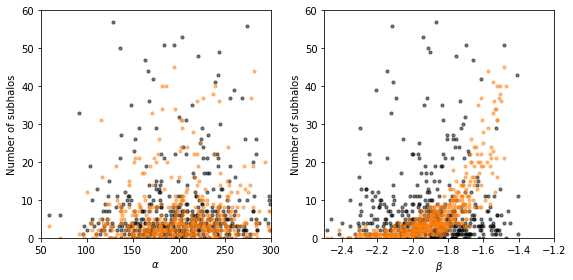

In [15]:
skip = 1
fig = plt.figure(figsize=(8,4))

ax = plt.subplot(1,2,1)
plt.scatter(theta_train[y_train==1][::skip, 0], n_subs_train[y_train==1][::skip], alpha=0.5, s=10., c='black')
plt.scatter(theta_train[y_train==0][::skip, 0], n_subs_train[y_train==0][::skip], alpha=0.5, s=10., c='C1')
plt.ylabel("Number of subhalos")
plt.xlabel(r"$\alpha$")
plt.ylim(0.,60.)
plt.xlim(50.,300.)

ax = plt.subplot(1,2,2)
plt.scatter(theta_train[y_train==1][::skip, 1], n_subs_train[y_train==1][::skip], alpha=0.5, s=10., c='black')
plt.scatter(theta_train[y_train==0][::skip, 1], n_subs_train[y_train==0][::skip], alpha=0.5, s=10., c='C1')
plt.ylabel("Number of subhalos")
plt.xlabel(r"$\beta$")
plt.ylim(0.,60.)
plt.xlim(-2.5,-1.2)

plt.tight_layout()
plt.savefig("../figures/nsub_vs_theta.pdf")

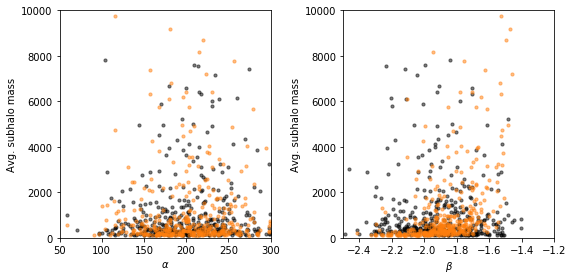

In [25]:
skip = 1
fig = plt.figure(figsize=(8,4))

ax = plt.subplot(1,2,1)
plt.scatter(theta_train[y_train==1][::skip, 0], avg_m_subs_train[y_train==1][::skip], alpha=0.5, s=10., c='black')
plt.scatter(theta_train[y_train==0][::skip, 0], avg_m_subs_train[y_train==0][::skip], alpha=0.5, s=10., c='C1')
plt.ylabel("Avg. subhalo mass")
plt.xlabel(r"$\alpha$")
plt.ylim(0.,10000.)
plt.xlim(50,300)

ax = plt.subplot(1,2,2)
plt.scatter(theta_train[y_train==1][::skip, 1], avg_m_subs_train[y_train==1][::skip], alpha=0.5, s=10., c='black')
plt.scatter(theta_train[y_train==0][::skip, 1], avg_m_subs_train[y_train==0][::skip], alpha=0.5, s=10., c='C1')
plt.ylabel("Avg. subhalo mass")
plt.xlabel(r"$\beta$")
plt.ylim(0.,10000.)
plt.xlim(-2.5,-1.2)

plt.tight_layout()
plt.savefig("../figures/msub_vs_theta.pdf")

## Plot augmented data vs n_subs

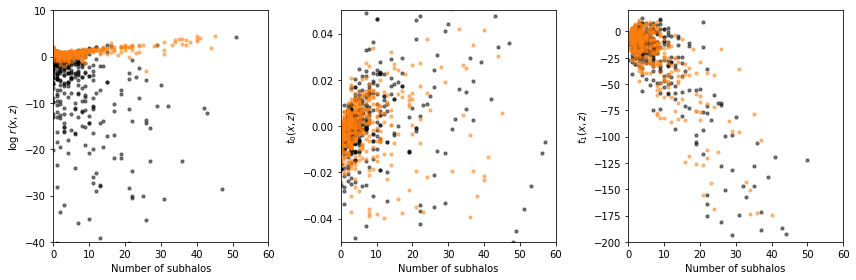

In [26]:
skip = 1
fig = plt.figure(figsize=(12,4))

ax = plt.subplot(1,3,1)
plt.scatter(n_subs_train[y_train==1][::skip], (log_r_xz_train[y_train==1][::skip]), alpha=0.5, s=10., c='black')
plt.scatter(n_subs_train[y_train==0][::skip], (log_r_xz_train[y_train==0][::skip]), alpha=0.5, s=10., c='C1')
plt.xlabel("Number of subhalos")
plt.ylabel(r"$\log \; r(x,z)$")
plt.xlim(0.,60.)
plt.ylim(-40,10.)

ax = plt.subplot(1,3,2)
plt.scatter(n_subs_train[y_train==1][::skip], t_xz_train[y_train==1][::skip, 0], alpha=0.5, s=10., c='black')
plt.scatter(n_subs_train[y_train==0][::skip], t_xz_train[y_train==0][::skip, 0], alpha=0.5, s=10., c='C1')
plt.xlabel("Number of subhalos")
plt.ylabel(r"$t_0(x,z)$")
plt.xlim(0.,60.)
plt.ylim(-.05,.05)

ax = plt.subplot(1,3,3)
plt.scatter(n_subs_train[y_train==1][::skip], t_xz_train[y_train==1][::skip, 1], alpha=0.5, s=10., c='black')
plt.scatter(n_subs_train[y_train==0][::skip], t_xz_train[y_train==0][::skip, 1], alpha=0.5, s=10., c='C1')
plt.xlabel("Number of subhalos")
plt.ylabel(r"$t_1(x,z)$")
plt.xlim(0.,60.)
plt.ylim(-200.,20.)

plt.tight_layout()
plt.savefig("../figures/nsub_vs_gold.pdf")

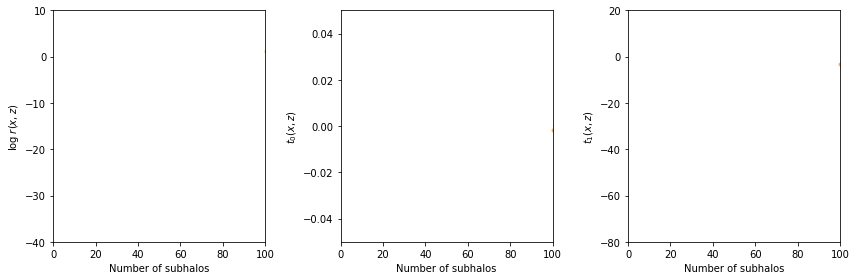

In [27]:
skip = 1
fig = plt.figure(figsize=(12,4))

ax = plt.subplot(1,3,1)
plt.scatter(avg_m_subs_train[y_train==1][::skip], (log_r_xz_train[y_train==1][::skip]), alpha=0.5, s=10., c='black')
plt.scatter(avg_m_subs_train[y_train==0][::skip], (log_r_xz_train[y_train==0][::skip]), alpha=0.5, s=10., c='C1')
plt.xlabel("Number of subhalos")
plt.ylabel(r"$\log \; r(x,z)$")
plt.xlim(0.,100.)
plt.ylim(-40,10.)

ax = plt.subplot(1,3,2)
plt.scatter(avg_m_subs_train[y_train==1][::skip], t_xz_train[y_train==1][::skip, 0], alpha=0.5, s=10., c='black')
plt.scatter(avg_m_subs_train[y_train==0][::skip], t_xz_train[y_train==0][::skip, 0], alpha=0.5, s=10., c='C1')
plt.xlabel("Number of subhalos")
plt.ylabel(r"$t_0(x,z)$")
plt.xlim(0.,100.)
plt.ylim(-.05,.05)

ax = plt.subplot(1,3,3)
plt.scatter(avg_m_subs_train[y_train==1][::skip], t_xz_train[y_train==1][::skip, 1], alpha=0.5, s=10., c='black')
plt.scatter(avg_m_subs_train[y_train==0][::skip], t_xz_train[y_train==0][::skip, 1], alpha=0.5, s=10., c='C1')
plt.xlabel("Number of subhalos")
plt.ylabel(r"$t_1(x,z)$")
plt.xlim(0.,100.)
plt.ylim(-80.,20.)

plt.tight_layout()
plt.savefig("../figures/avg_msub_vs_gold.pdf")

## Everything

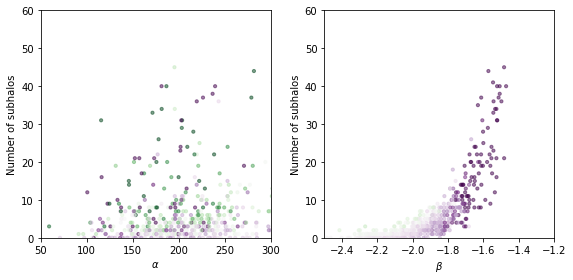

In [29]:
skip = 1
fig = plt.figure(figsize=(8,4))

ax = plt.subplot(1,2,1)
plt.scatter(
    theta_train[y_train==0][::skip, 0], n_subs_train[y_train==0][::skip],
    c=t_xz_train[y_train==0][::skip,0], vmin=-0.02, vmax=0.02, cmap='PRGn',
    alpha=0.5, s=10.
)
plt.ylabel("Number of subhalos")
plt.xlabel(r"$\alpha$")
plt.ylim(0.,60.)
plt.xlim(50,300)

ax = plt.subplot(1,2,2)
plt.scatter(
    theta_train[y_train==0][::skip, 1], n_subs_train[y_train==0][::skip],
    c=t_xz_train[y_train==0][::skip,1], vmin=-40, vmax=40, cmap='PRGn',
    alpha=0.5, s=10.
)
plt.ylabel("Number of subhalos")
plt.xlabel(r"$\beta$")
plt.ylim(0.,60.)
plt.xlim(-2.5,-1.2)

plt.tight_layout()
plt.savefig("../figures/theta_nsub_score.pdf")

## Expectation values

In [8]:
np.mean(np.exp(-log_r_xz_train[y_train==0]))

0.5823187952036574

In [9]:
np.mean(np.exp(log_r_xz_train[y_train==1]))

1.0545989785084493

In [10]:
np.mean(t_xz_train[y_train==0][:,0])

-0.0002474690497711836

In [11]:
np.std(t_xz_train[y_train==0][:,0])

0.014726526174940953

In [12]:
np.mean(t_xz_train[y_train==0][:,1])

-28.556244660836015

In [13]:
np.std(t_xz_train[y_train==0][:,1])

69.58445437219564